
# **서울시 따릉이 대여량 예측 프로그램**


In [52]:
# 드라이브에 연결
from google.colab import drive
path = "/content/drive"
drive.mount(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# 이렇게 해야지 인식이 됌
path = "/content/drive/MyDrive/dda-bike"

In [54]:
import pandas as pd
import numpy as np

In [55]:
train = pd.read_csv(path + '/train.csv')
train.head(10) 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [56]:
test = pd.read_csv(path + '/test.csv')
test.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
5,10,9,20.2,0.0,4.3,39.0,2000.0,0.034,22.0,7.0
6,11,18,19.0,0.0,2.7,80.0,2000.0,0.028,17.0,12.0
7,12,18,31.2,0.0,2.2,42.0,621.0,0.117,94.0,69.0
8,15,6,20.1,0.0,0.8,78.0,463.0,0.026,57.0,33.0
9,17,8,17.0,1.0,0.9,100.0,200.0,0.022,12.0,12.0


In [57]:
submission = pd.read_csv(path + '/submission.csv')
submission.head(10)

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
5,10,NaN
6,11,NaN
7,12,NaN
8,15,NaN
9,17,NaN


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


id                            AxesSubplot(0.125,0.71587;0.168478x0.16413)
hour                       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
hour_bef_temperature       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
hour_bef_precipitation     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
hour_bef_windspeed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
hour_bef_humidity         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
hour_bef_visibility       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
hour_bef_ozone            AxesSubplot(0.731522,0.518913;0.168478x0.16413)
hour_bef_pm10                AxesSubplot(0.125,0.321957;0.168478x0.16413)
hour_bef_pm2.5            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
count                     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

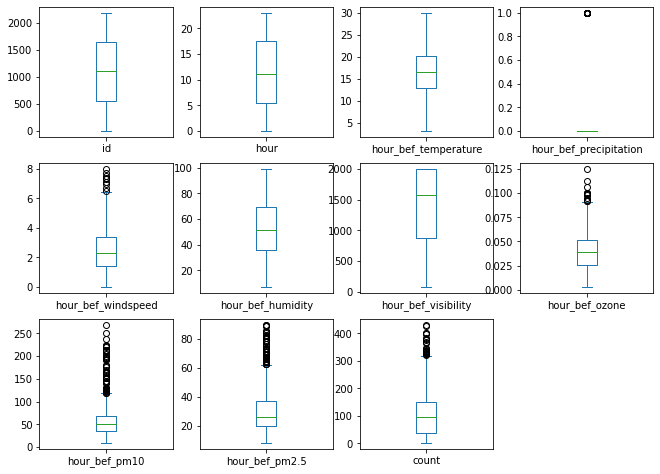

In [60]:
# *hour : 시간 / *temperature : 온도 / *precipitation : 비가 오지 않았으면 0, 비가 오면 1 
# windspeed : 풍속(평균) / humidity : 습도 / visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
# ozone : 오존 / *pm10: 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
# *pm2.5 : 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
# *count : 시간에 따른 따릉이 대여 수

train.plot(kind = 'box', subplots = True, layout=(4,4), figsize=(11, 11))

id                            AxesSubplot(0.125,0.71587;0.168478x0.16413)
hour                       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
hour_bef_temperature       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
hour_bef_precipitation     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
hour_bef_windspeed           AxesSubplot(0.125,0.518913;0.168478x0.16413)
hour_bef_humidity         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
hour_bef_visibility       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
hour_bef_ozone            AxesSubplot(0.731522,0.518913;0.168478x0.16413)
hour_bef_pm10                AxesSubplot(0.125,0.321957;0.168478x0.16413)
hour_bef_pm2.5            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

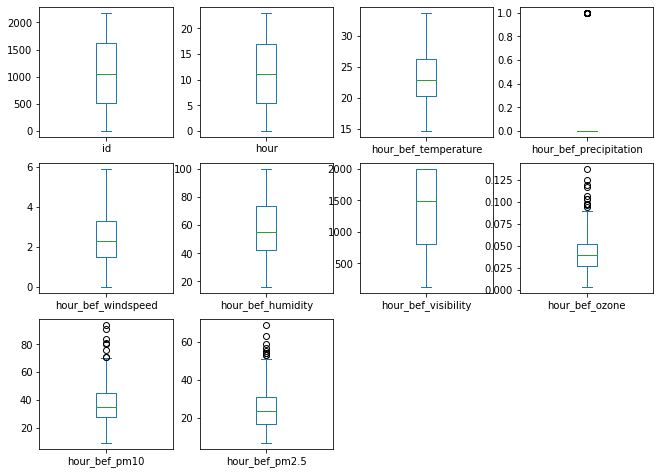

In [61]:
test.plot(kind = 'box', subplots = True, layout=(4,4), figsize=(11,11))

In [62]:
# 결손값 처리
# pm10, pm2.5, ozone은 값이 비어있는 값들이 많음
# inplace가True이면 모든NaN 값을 주어진value로 대체한다.
# 해당열의 평균값으로 대체했다.

train.fillna(train.mean(),inplace=True)

In [63]:
train.isnull()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,False,False,False,False,False
1455,False,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,False


In [64]:
# null값이 있는지 확인
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [65]:
# 변수명이 너무 길어서 알아보기 쉽게 변경
train.rename(columns = {'hour_bef_temperature':'temperature','hour_bef_precipitation':'precipitation','hour_bef_pm10':'pm10','hour_bef_pm2.5':'pm2.5',       
'hour_bef_windspeed': 'windspeed', 'hour_bef_humidity':'humidity','hour_bef_visibility':'visibility','hour_bef_ozone':'ozone', },inplace=True)
train


,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


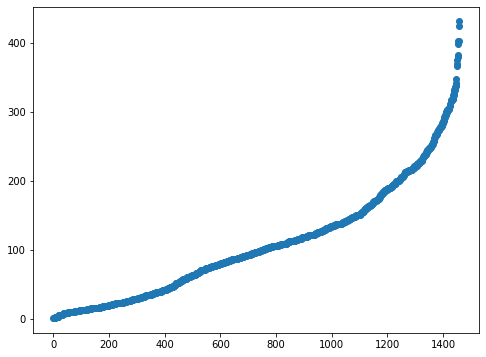

In [66]:
#데이터 시각화 시작
#따릉이 대여수 이상치 분석 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train['count'].values))
plt.show()



8.0

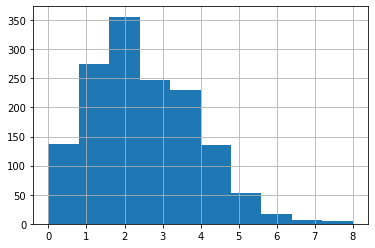

In [67]:
# 풍속 변수인데 따릉이 예측에 필요한 데이터는 아닌거 같음
train['windspeed'].hist()
train['windspeed'].max()

In [68]:
# 비올 확률을 계산하고싶은데 잘 모르겠어서 0과1로 나누어진 데이터의 평균을 구해버렸다. 
avg = np.mean(train['precipitation'])
print(avg)

0.031571722717913524


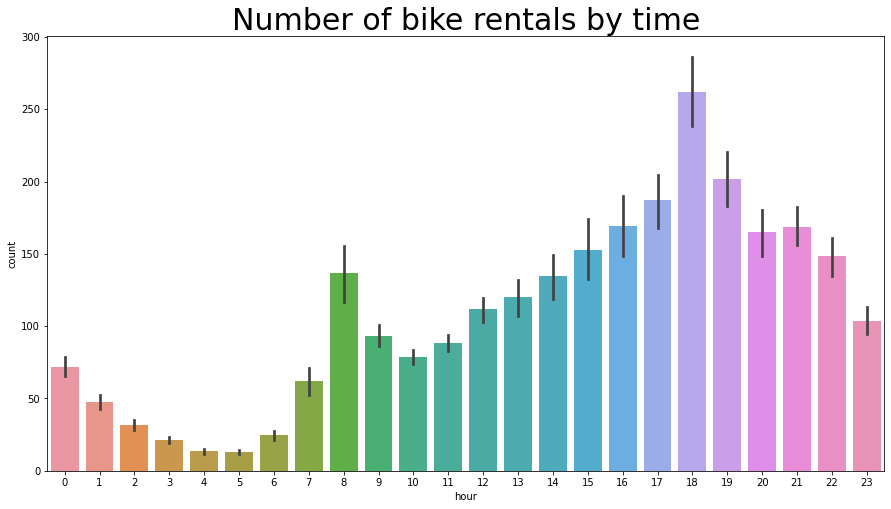

In [69]:
# 시간에 따른 따릉이 대여수

import seaborn as sns

plt.figure(figsize = (15,8))

sns.barplot(x = train['hour'], y = train['count'])
plt.title('Number of bike rentals by time', fontsize = 30)
plt.show()

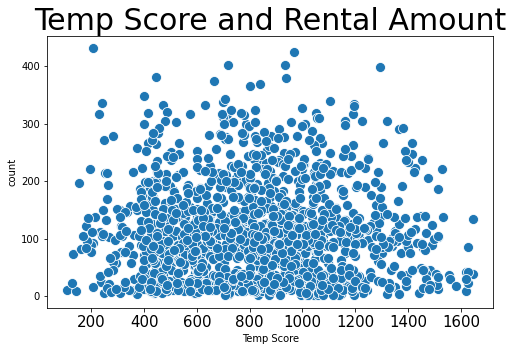

In [70]:
# 온도 + 습도와 따릉이 대여량의 관계 

temp_score = train['temperature'] * train['humidity']

plt.figure(figsize = (8,5))
sns.scatterplot(x = temp_score, y = train['count'],  s = 100)
plt.xticks(fontsize = 15)
plt.title('Temp Score and Rental Amount', fontsize = 30)
plt.xlabel('Temp Score')
plt.show()

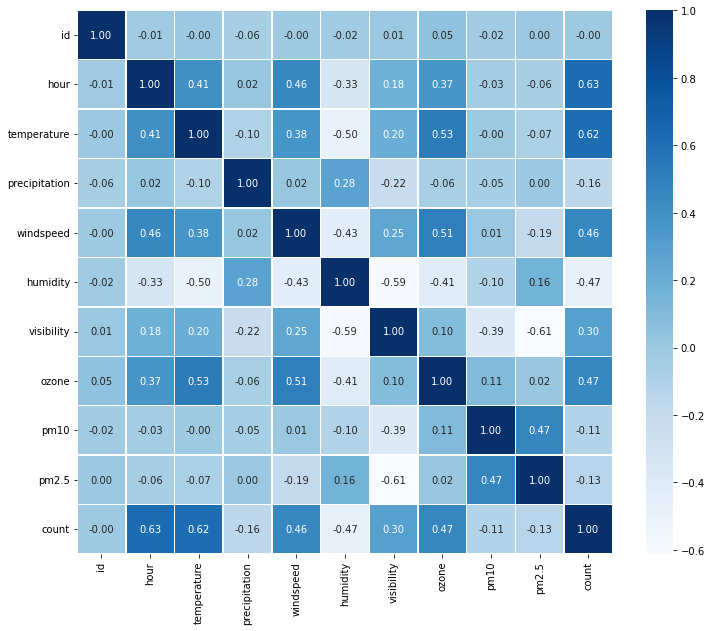

In [71]:
#상관관계 도출

plt.figure(figsize = (12,10))
sns.heatmap(data = train.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

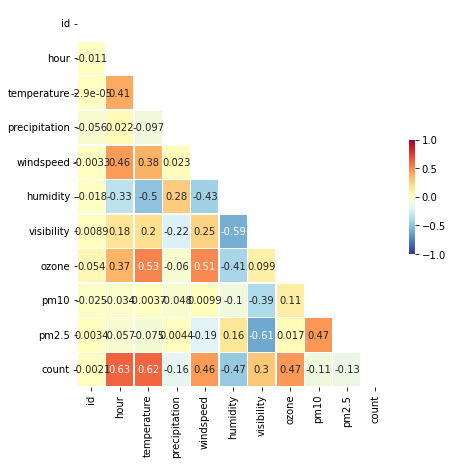

In [72]:
fig, ax = plt.subplots(figsize=(7,7))

corr = train.corr()
mask = np.zeros_like(corr, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask,
annot = True, linewidth=.5,
cmap = 'RdYlBu_r', cbar_kws = {"shrink": .3}, # shrink cbar(cmap)
vmin = -1, vmax = 1)
plt.show()

<img src = "https://drive.google.com/uc?id=1nIdrmF3ys452z9TSyqgwSYACBZCdtXXB" height = 300 width = 500>

In [73]:
train['pm10'].value_counts()

57.168736     90
32.000000     36
34.000000     33
48.000000     31
54.000000     28
              ..
205.000000     1
131.000000     1
152.000000     1
165.000000     1
113.000000     1
Name: pm10, Length: 149, dtype: int64

In [74]:
train['pm2.5'].value_counts()

30.327124    117
22.000000     69
19.000000     64
21.000000     62
25.000000     55
            ... 
75.000000      1
82.000000      1
78.000000      1
72.000000      1
74.000000      1
Name: pm2.5, Length: 80, dtype: int64

In [75]:
#미세먼지에 따른 가시성 pm2.5 와 visibility 근데 pm2.5 데이터 양이 너무 많아서 시각화 하기 어려움

In [76]:
#필요 없는 피쳐 제거 Feature Selection 

In [77]:
train = train.drop(['id'], axis = 1) #얘는 무조건 빼도됌

In [78]:
train.head()

,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [79]:
#데이터 셋 분리 

In [80]:
# test도 똑같이 변수명이 너무 길어서 알아보기 쉽게 변경
test.rename(columns = {'hour_bef_temperature':'temperature','hour_bef_precipitation':'precipitation','hour_bef_pm10':'pm10','hour_bef_pm2.5':'pm2.5',       
'hour_bef_windspeed': 'windspeed', 'hour_bef_humidity':'humidity','hour_bef_visibility':'visibility','hour_bef_ozone':'ozone', },inplace=True)
train


,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5,count
0,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [81]:
train_list = ['hour',	'temperature',	'precipitation',	'humidity',	'visibility',	'pm10',	'pm2.5','ozone','windspeed']

In [82]:
train_pred = ['count']

In [83]:
from sklearn.model_selection import train_test_split #어떤 모델이 좋은지 알아보기 위해서 쓴다.
x_train, x_test, y_train, y_test = train_test_split(train[train_list], train['count'], random_state = 42,test_size = 0.1)

In [84]:
x_train

,hour,temperature,precipitation,humidity,visibility,pm10,pm2.5,ozone,windspeed
906,11,12.3,0.0,13.0,2000.0,48.000000,13.000000,0.036000,4.5
781,20,15.0,0.0,81.0,979.0,37.000000,21.000000,0.040000,2.7
1278,1,14.1,0.0,69.0,1970.0,57.168736,30.327124,0.039149,1.3
620,3,13.3,0.0,43.0,2000.0,19.000000,9.000000,0.037000,2.5
668,9,12.1,0.0,35.0,1975.0,36.000000,28.000000,0.028000,4.1
...,...,...,...,...,...,...,...,...,...
1095,6,10.7,0.0,99.0,78.0,32.000000,28.000000,0.034000,2.5
1130,5,11.9,0.0,90.0,228.0,72.000000,60.000000,0.005000,2.1
1294,14,21.6,0.0,27.0,2000.0,20.000000,10.000000,0.049000,4.5
860,4,11.7,0.0,38.0,1645.0,70.000000,43.000000,0.065000,2.2


In [85]:
x_test

,hour,temperature,precipitation,humidity,visibility,pm10,pm2.5,ozone,windspeed
1321,11,11.700000,0.000000,47.000000,513.000000,95.000000,86.000000,0.031000,2.000000
836,3,10.900000,0.000000,74.000000,730.000000,71.000000,33.000000,0.029000,1.400000
413,10,16.600000,0.000000,53.000000,1145.000000,128.000000,30.000000,0.011000,0.900000
522,11,17.100000,0.000000,55.000000,1982.000000,55.000000,12.000000,0.035000,2.400000
1035,18,16.717433,0.031572,52.231297,1405.216884,57.168736,30.327124,0.039149,2.479034
...,...,...,...,...,...,...,...,...,...
526,16,20.500000,0.000000,34.000000,1962.000000,61.000000,14.000000,0.053000,4.600000
101,3,11.700000,0.000000,98.000000,150.000000,20.000000,20.000000,0.041000,3.900000
882,23,13.500000,0.000000,39.000000,1924.000000,80.000000,20.000000,0.038000,2.200000
411,15,18.800000,0.000000,41.000000,1632.000000,78.000000,26.000000,0.043000,3.800000


In [86]:
x_train, y_train

(      hour  temperature  precipitation  humidity  visibility       pm10  \
 906     11         12.3            0.0      13.0      2000.0  48.000000   
 781     20         15.0            0.0      81.0       979.0  37.000000   
 1278     1         14.1            0.0      69.0      1970.0  57.168736   
 620      3         13.3            0.0      43.0      2000.0  19.000000   
 668      9         12.1            0.0      35.0      1975.0  36.000000   
 ...    ...          ...            ...       ...         ...        ...   
 1095     6         10.7            0.0      99.0        78.0  32.000000   
 1130     5         11.9            0.0      90.0       228.0  72.000000   
 1294    14         21.6            0.0      27.0      2000.0  20.000000   
 860      4         11.7            0.0      38.0      1645.0  70.000000   
 1126    19         19.4            0.0      55.0       649.0  70.000000   
 
           pm2.5     ozone  windspeed  
 906   13.000000  0.036000        4.5  
 781  

In [87]:
y_test

1321     55.0
836      29.0
413      63.0
522      98.0
1035      1.0
        ...  
526     337.0
101       3.0
882      63.0
411     119.0
1024     79.0
Name: count, Length: 146, dtype: float64

In [103]:
#릿지(Ridge) : 선형 회귀에 L2규제를 추가한 회귀 모델
# Ridge regression (릿지 회귀)
from sklearn.linear_model import Ridge
ride = Ridge().fit(x_train, y_train)
pred1 = ride.predict(x_test)
print("Ridge 정확도 : {:.2f}".format(ride.score(x_train, y_train)))



Ridge 정확도 : 0.59


In [104]:
#라쏘(Lasso) : 선형 회귀에 L1규제를 추가한 회귀 모델
#Lasso regression (라쏘 회귀)
from sklearn.linear_model import Lasso
lasso = Lasso().fit(x_train,y_train)
pred2 = lasso.predict(x_test)
print("Lasso 정확도 : {:.2f}".format(lasso.score(x_train, y_train)))


Lasso 정확도 : 0.58


In [105]:
from xgboost import XGBRegressor

#XGBBooster 학습/예측/평가
model = XGBRegressor().fit(x_train, y_train)
pred3 = model.predict(x_test)
print("XGB 정확도 : {:.2f}".format(model.score(x_train, y_train)))

[13:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB 정확도 : 0.85


In [91]:
Num_pred = (pred1 + pred2 + pred3) / 3

In [92]:
Num_pred.shape

(146,)

In [93]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, x_train, y_train))
Num_pred.shape


[13:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:46:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.78939348 0.74858304 0.75748238 0.72150549 0.76448471]


(146,)

In [94]:
rmse =0
for tr,ts in zip(Num_pred, y_test):
  rmse += np.sqrt((tr-ts)**2)
print(rmse/146)

32.54118170589702


In [95]:
test

,id,hour,temperature,precipitation,windspeed,humidity,visibility,ozone,pm10,pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [96]:
test[train_list]

,hour,temperature,precipitation,humidity,visibility,pm10,pm2.5,ozone,windspeed
0,7,20.7,0.0,62.0,954.0,44.0,27.0,0.041,1.3
1,17,30.0,0.0,33.0,1590.0,49.0,36.0,0.061,5.4
2,13,19.0,1.0,95.0,193.0,36.0,28.0,0.020,2.1
3,6,22.5,0.0,60.0,1185.0,52.0,38.0,0.027,2.5
4,22,14.6,1.0,93.0,218.0,18.0,15.0,0.041,3.4
...,...,...,...,...,...,...,...,...,...
710,1,24.6,0.0,60.0,1745.0,NaN,NaN,NaN,2.4
711,1,18.1,0.0,55.0,2000.0,NaN,NaN,NaN,1.0
712,9,23.3,0.0,66.0,1789.0,17.0,15.0,0.020,2.3
713,16,27.0,0.0,46.0,1956.0,40.0,26.0,0.032,1.6


In [106]:
Num_pred = model.predict(test[train_list])
Num_pred

array([ 86.31441  , 234.95006  ,  69.75852  ,  51.2855   ,  50.16808  ,
       143.62784  , 236.64432  , 347.57053  ,  41.864254 , 100.59426  ,
       279.57013  , 240.55473  , 134.91245  ,  47.806873 , 209.57352  ,
       172.92607  ,  38.844517 , 185.60309  , 341.65384  , 168.52133  ,
       180.19572  ,  72.89288  ,  32.116974 , 117.1583   , 137.24615  ,
       104.24465  ,  28.41272  , 129.76239  , 113.555954 , 188.92279  ,
        74.7495   ,  43.20639  ,  93.450005 , 120.03953  , 264.0515   ,
        37.614876 , 149.8706   , 157.66417  , 220.54654  ,  78.67105  ,
        60.792496 , 131.52003  , 141.1352   ,  78.046005 , 299.42163  ,
       190.9767   ,  58.82354  ,  78.57281  ,  36.570843 ,  80.433464 ,
       232.05661  ,  94.66725  , 115.9694   ,  75.37969  , 164.13846  ,
       141.1352   ,  71.23088  , 172.8986   ,  35.438717 ,  31.634542 ,
       104.97994  ,  98.09902  , 279.152    , 279.9238   , 144.81963  ,
       297.83054  ,  34.161346 , 241.05994  , 164.63293  ,  40.8

In [107]:
Num_pred.shape

(715,)

In [108]:
for r in Num_pred:
  if r < 0:
    print(r)

-1.6294098


In [109]:
for idx in range(Num_pred.__len__()):
  if Num_pred[idx] < 0:
    print(Num_pred[idx])
    Num_pred[idx] = 0
    print(Num_pred[idx])

-1.6294098
0.0


In [101]:
submission['count'] =Num_pred

In [102]:
submission.to_csv("r_pred.csv",index = False)